### Import libraries

In [185]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import neattext.functions as nfx
import re
import joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Dataset loading

In [187]:
train_df = load_emotion_data("train.txt")
val_df = load_emotion_data("val.txt")
test_df = load_emotion_data("test.txt")

In [191]:
 df = pd.concat([train_df, val_df], ignore_index=True)


### Data Cleaning

In [193]:
def clean_text(text):
    if isinstance(text, str):
        text = nfx.remove_userhandles(text)
        text = nfx.remove_stopwords(text)
        text = nfx.remove_punctuations(text)
        text = text.lower()
        return text
    return ""

df["Clean_Text"] = df["Text"].apply(clean_text)
test_df["Clean_Text"] = test_df["Text"].apply(clean_text)

In [195]:
X_train = df["Clean_Text"]
y_train = df["Emotion"]
X_test = test_df["Clean_Text"]
y_test = test_df["Emotion"]

### ML Pipeline

In [197]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer()),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

### Model Train

In [199]:

model.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

### Accuracy Score 

In [201]:
print("✅ Test Accuracy:", model.score(X_test, y_test))
y_pred = model.predict(X_test)
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))


✅ Test Accuracy: 0.8845

✅ Classification Report:
               precision    recall  f1-score   support

       anger       0.87      0.90      0.88       275
        fear       0.87      0.83      0.85       224
         joy       0.94      0.88      0.91       695
        love       0.69      0.91      0.79       159
     sadness       0.96      0.89      0.93       581
    surprise       0.58      0.86      0.69        66

    accuracy                           0.88      2000
   macro avg       0.82      0.88      0.84      2000
weighted avg       0.90      0.88      0.89      2000



### Confusion Matrix

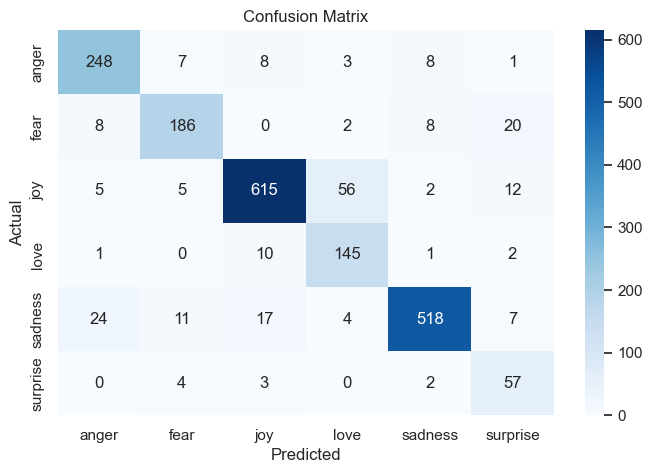

In [203]:
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Save the model

In [205]:
joblib.dump(model, "emotion_model.joblib")
print("✅ Model saved as emotion_model.joblib")

✅ Model saved as emotion_model.joblib


### User Input prediction

In [ ]:
print("\n🔍 Emotion Prediction — Type your text (type 'exit' to quit):")
while True:
    user_input = input("Your Text: ")
    if user_input.lower() == 'exit':
        print("👋 Exiting...")
        break

    cleaned_input = clean_text(user_input)
    prediction = model.predict([cleaned_input])[0]
    print(f"🎯 Predicted Emotion: {prediction}\n")


🔍 Emotion Prediction — Type your text (type 'exit' to quit):
